# Task 2: Model Baseline and Data preparation

**Course:** Introduction to Data Science
**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [1]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [2]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [3]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [4]:
# 'dteday' is not neccessary and breaks the code
train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [5]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [6]:
# train_features
# train_labels
# test_features
# test_labels

### 1.3. Linear Regresion

In [7]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [8]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

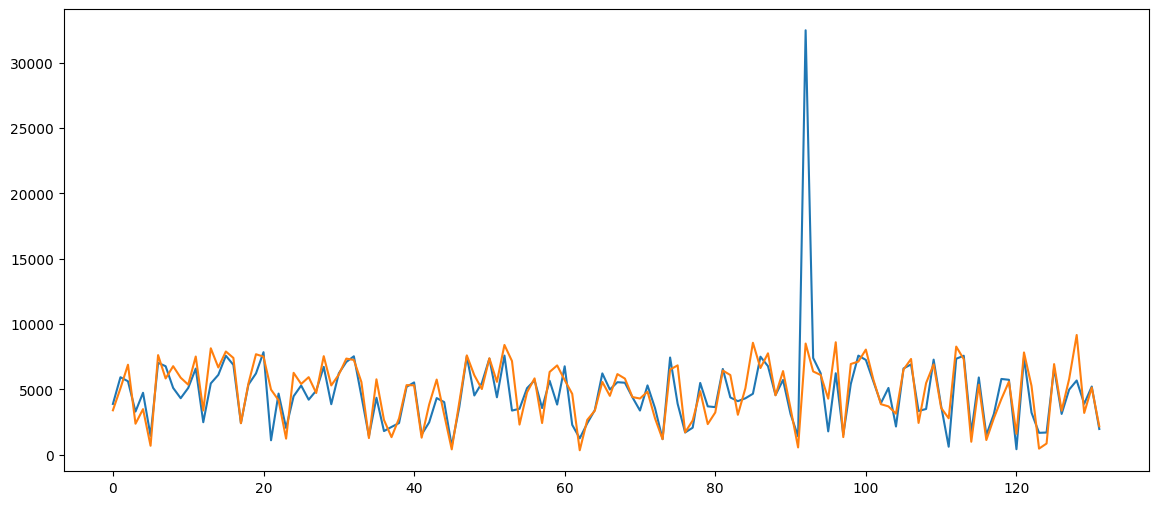

In [9]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [10]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


### 1.4. Evaluate Baseline model

In [12]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248


## 2. Preprocessing

In [13]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 2.1. Train Data Preprocessing

In [14]:
#hum has to many outliers
#windspeed has only 4 outliers, can be handled via imputation
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop / don't use later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [15]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [16]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [17]:
train_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836


In [18]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek
train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int32

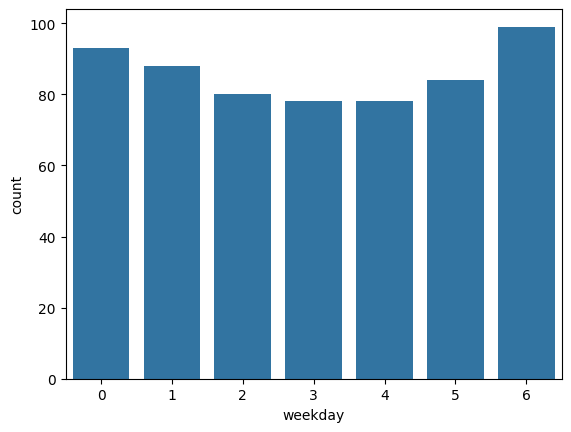

In [19]:
sns.countplot(x='weekday', data=train_df)
plt.show()

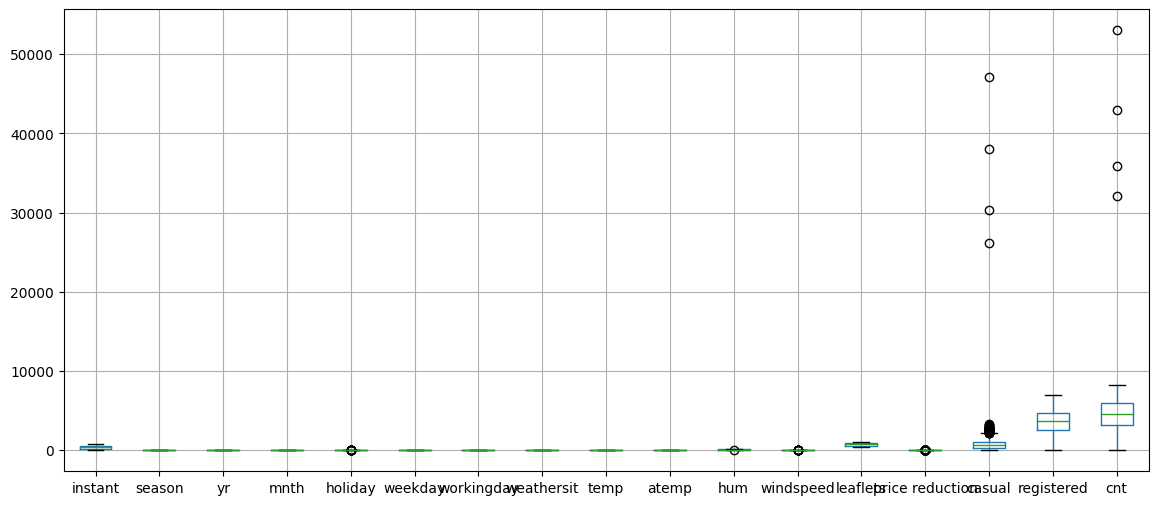

In [20]:
boxplot = train_df.boxplot(figsize=(14, 6))
plt.show()

In [21]:
index_names = train_df[ train_df['cnt'] > 20000 ].index 
# drop these row indexes 
# from dataFrame 
train_df = train_df.drop(index_names) 

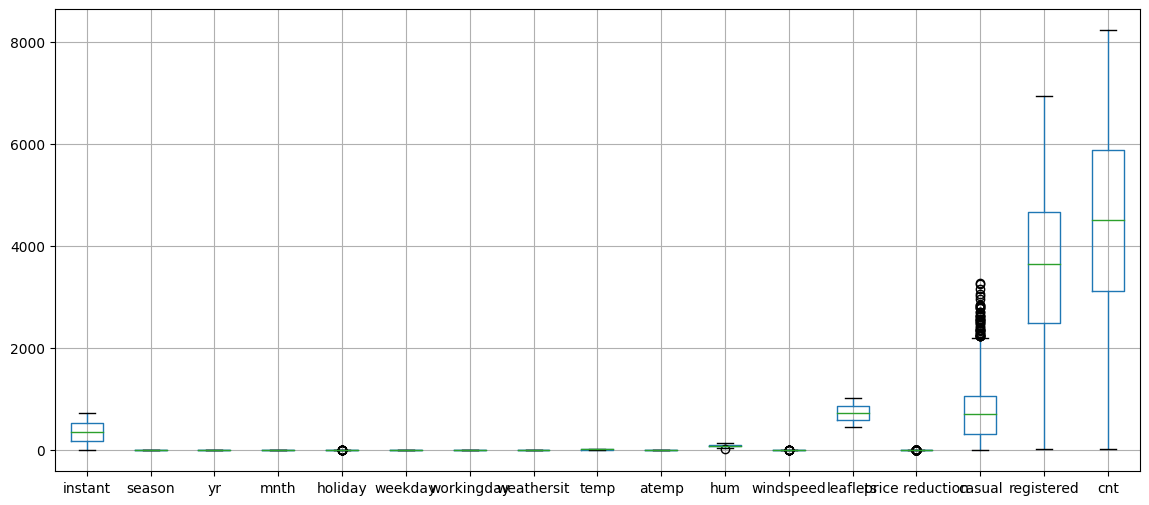

In [22]:
boxplot = train_df.boxplot(figsize=(14, 6))
plt.show()

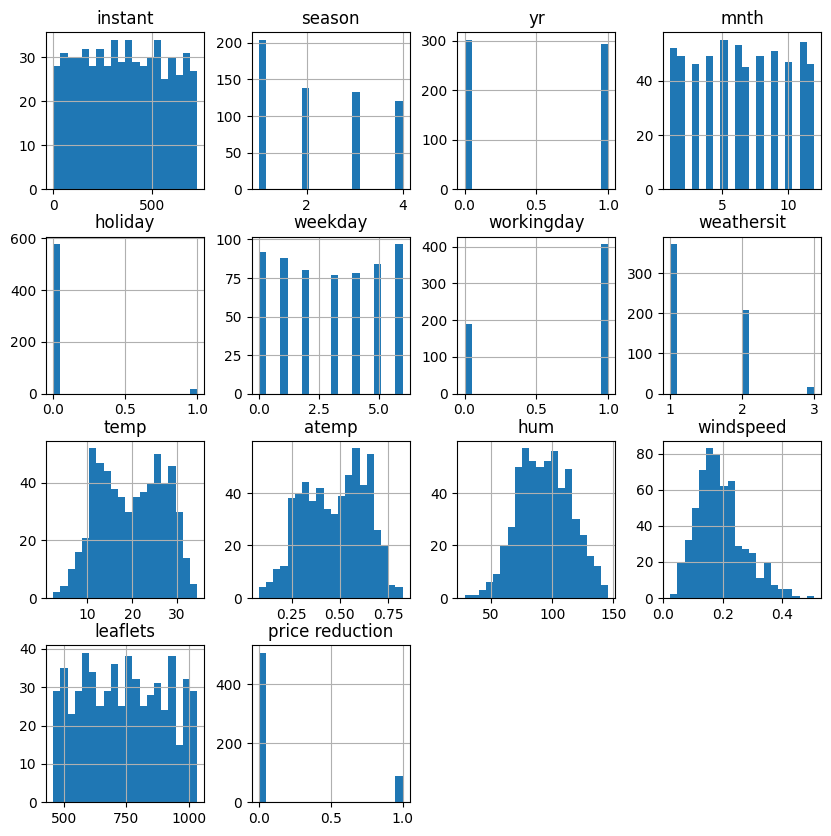

In [23]:
# histogram plot
hist = train_df.iloc[:, :15].hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

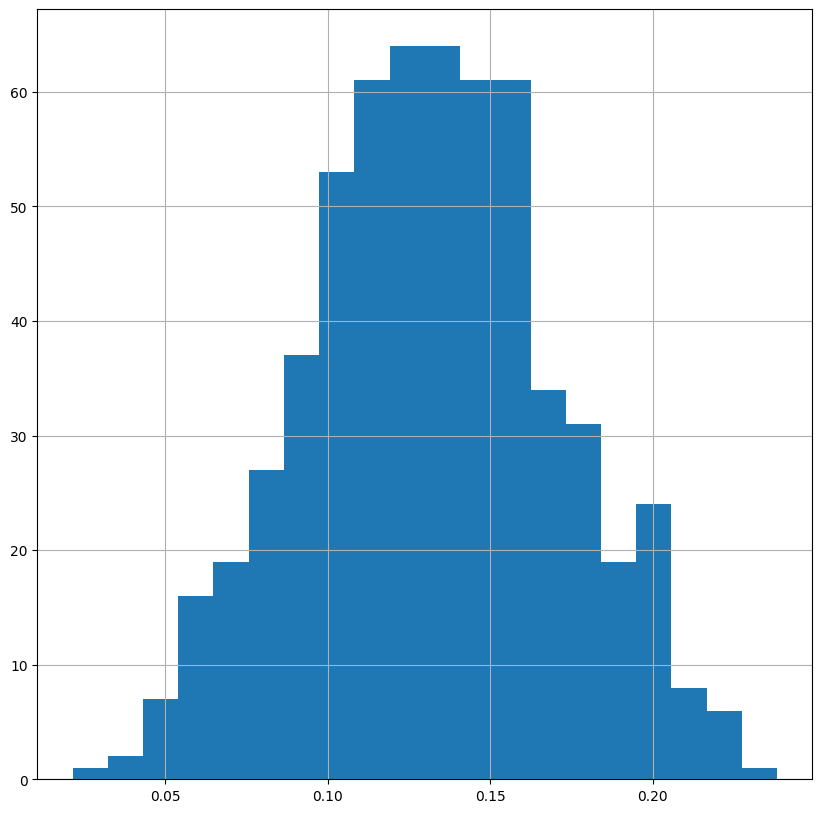

In [24]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].array.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

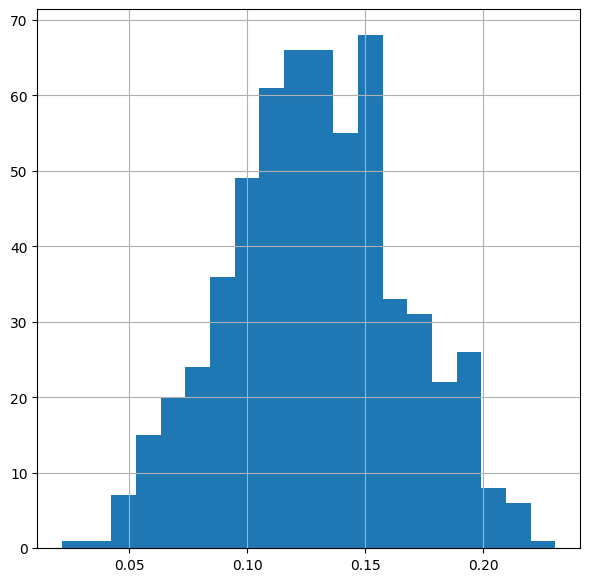

In [25]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].values.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(7, 7))

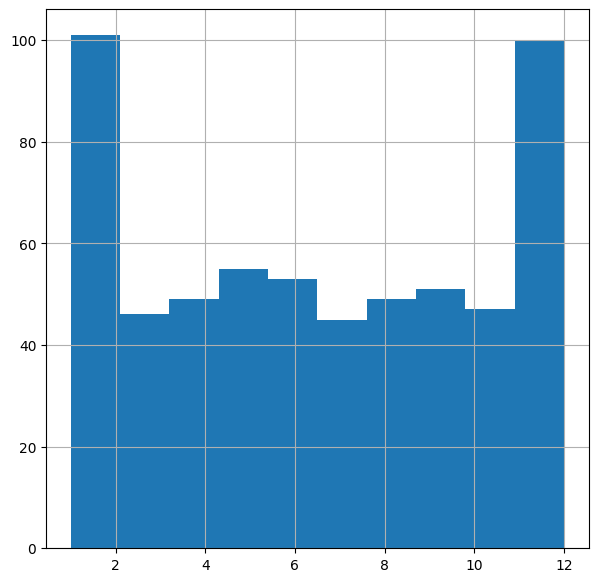

In [26]:
hist = train_df['mnth'].hist(figsize=(7, 7))

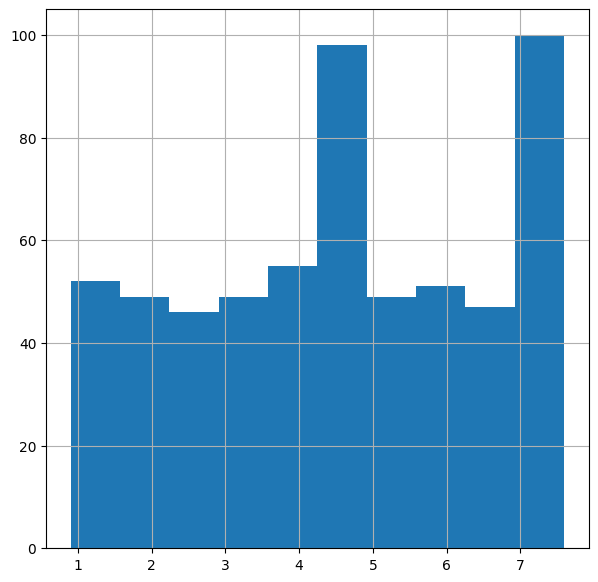

In [27]:
pt = PowerTransformer(standardize=False)
trans_mnth= pt.fit_transform(np.array(train_df['mnth'].values.reshape(-1, 1)))
train_df['mnth']=trans_mnth
hist = train_df['mnth'].hist(figsize=(7, 7))

In [28]:
train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,4.320660,0,0,1,1,24.8000,0.587133,53.12505,0.161118,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,7.078484,0,6,1,2,12.8667,0.324492,93.06255,0.114392,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,0.903582,0,1,1,1,6.0000,0.126275,66.18750,0.198321,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,3.077066,1,0,0,1,26.5667,0.614925,84.25005,0.172953,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,2.406397,0,1,0,2,20.5667,0.505046,113.37495,0.089160,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,2.406397,0,2,0,1,18.9000,0.466525,56.87505,0.199010,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,2.406397,0,5,1,1,17.6667,0.440642,93.68745,0.149874,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,0.903582,0,3,1,2,15.3000,0.381938,120.43755,0.129101,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,6.556285,0,2,1,2,19.3667,0.472846,108.06255,0.111974,605,0,404,3490,3894


### 2.2. Test Data Preprocessing

In [29]:
#Again, alot of hum values are over 100, so we have some outliers here, so we delete it also
print(len(test_df[test_df["hum"] > 100]))

45


In [30]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

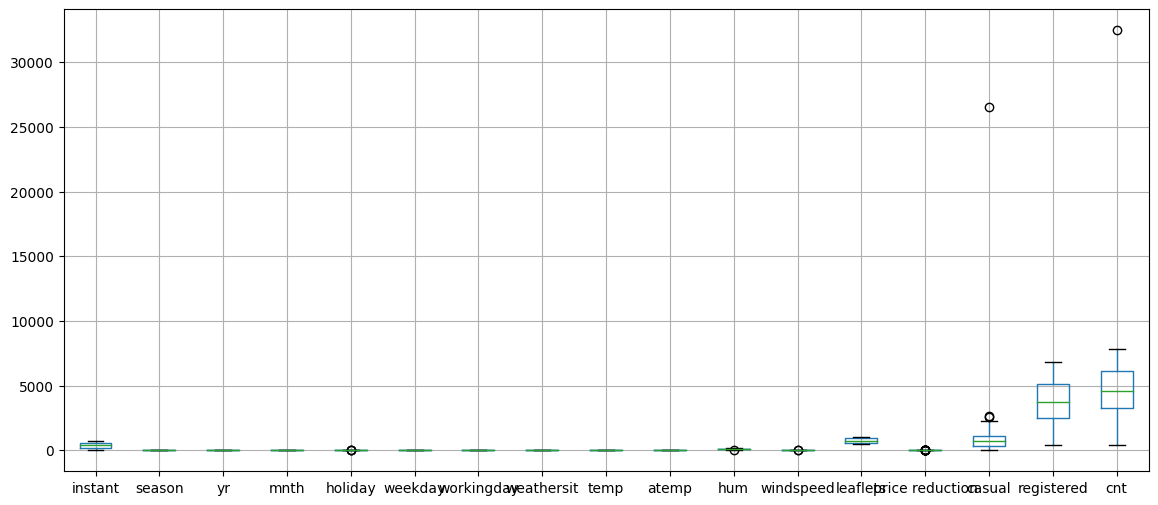

In [31]:
boxplot = test_df.boxplot(figsize=(14, 6))
plt.show()

In [32]:
feature_test_df = test_df.iloc[:, :15]
feature_test_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.148642,605,0
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.312139,518,0
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.179729,766,0
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.063450,739,0
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.110087,463,0


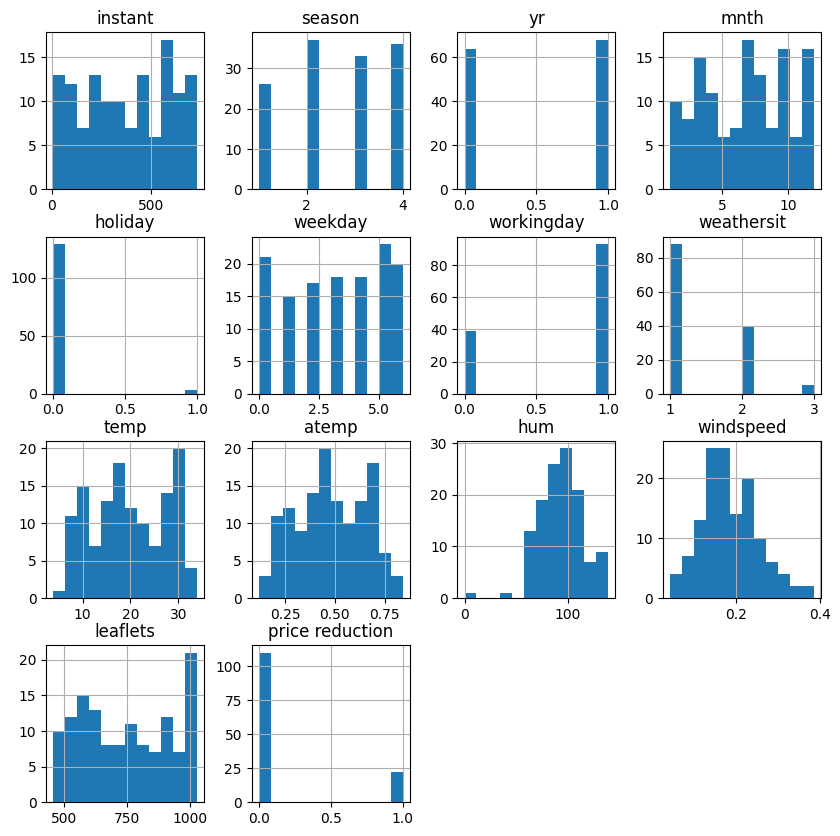

In [33]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

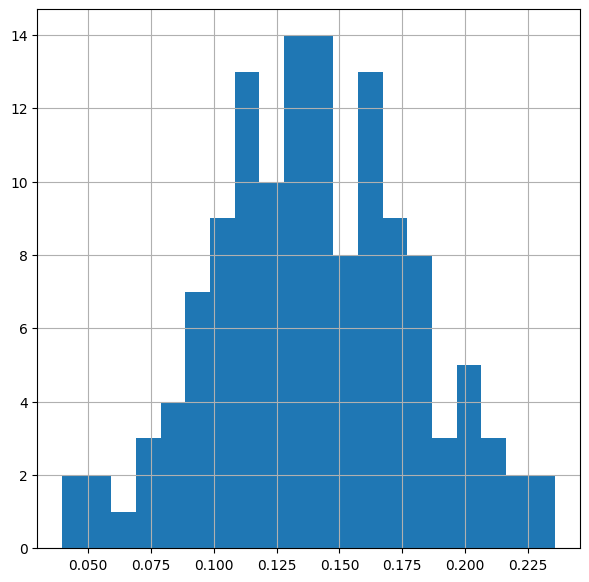

In [34]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].values.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(7, 7))

In [35]:
test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.120161,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.206779,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.139545,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.057694,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.093734,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,6,1,1,19.4333,0.475371,92.31255,0.166143,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,0,0,1,30.6000,0.687508,90.18750,0.128105,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,4,1,2,25.4000,0.575158,127.31250,0.120153,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,5,1,1,29.1333,0.654688,74.68755,0.183799,585,0,848,4377,5225


## 3. Feature Selection

In [36]:
train_df = train_df.drop('dteday', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1).drop('temp', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1).drop('temp', axis=1)

### 3.1. Correlation

In [37]:
#calculate correlations between all features of your data frame (see Exploration lab)
train_corr = train_df.corr()
print(train_corr)

# Displaying correlations as a heatmap / correlation matrix 
train_corr.style.background_gradient(cmap='coolwarm')

                  instant    season        yr      mnth   holiday   weekday  \
instant          1.000000  0.316424  0.862785  0.476771  0.036888 -0.011933   
season           0.316424  1.000000 -0.033477  0.694750 -0.001416 -0.009581   
yr               0.862785 -0.033477  1.000000 -0.029750  0.021979 -0.025109   
mnth             0.476771  0.694750 -0.029750  1.000000  0.030599  0.016099   
holiday          0.036888 -0.001416  0.021979  0.030599  1.000000 -0.062369   
weekday         -0.011933 -0.009581 -0.025109  0.016099 -0.062369  1.000000   
workingday      -0.001219 -0.005619  0.008882 -0.017098 -0.258964 -0.002467   
weathersit       0.000775  0.032999 -0.039531  0.067317 -0.022563  0.043374   
atemp            0.131830  0.319582  0.028998  0.262461 -0.027784 -0.022056   
windspeed       -0.148573 -0.211800 -0.021385 -0.259496  0.015886  0.019229   
leaflets        -0.109148 -0.007392 -0.080441 -0.075719 -0.048116  0.005699   
price reduction -0.022923 -0.010487 -0.008500 -0.024

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
instant,1.000000,0.316424,0.862785,0.476771,0.036888,-0.011933,-0.001219,0.000775,0.131830,-0.148573,-0.109148,-0.022923,0.606313
season,0.316424,1.000000,-0.033477,0.694750,-0.001416,-0.009581,-0.005619,0.032999,0.319582,-0.211800,-0.007392,-0.010487,0.348816
yr,0.862785,-0.033477,1.000000,-0.029750,0.021979,-0.025109,0.008882,-0.039531,0.028998,-0.021385,-0.080441,-0.008500,0.549341
mnth,0.476771,0.694750,-0.029750,1.000000,0.030599,0.016099,-0.017098,0.067317,0.262461,-0.259496,-0.075719,-0.024775,0.285624
holiday,0.036888,-0.001416,0.021979,0.030599,1.000000,-0.062369,-0.258964,-0.022563,-0.027784,0.015886,-0.048116,-0.046430,-0.068206
weekday,-0.011933,-0.009581,-0.025109,0.016099,-0.062369,1.000000,-0.002467,0.043374,-0.022056,0.019229,0.005699,0.055231,-0.064559
workingday,-0.001219,-0.005619,0.008882,-0.017098,-0.258964,-0.002467,1.000000,0.067185,0.050782,0.001836,0.012017,0.032606,0.059241
weathersit,0.000775,0.032999,-0.039531,0.067317,-0.022563,0.043374,0.067185,1.000000,-0.095395,0.048001,-0.020918,0.036114,-0.299036
atemp,0.131830,0.319582,0.028998,0.262461,-0.027784,-0.022056,0.050782,-0.095395,1.000000,-0.185680,0.009075,-0.016678,0.635856
windspeed,-0.148573,-0.211800,-0.021385,-0.259496,0.015886,0.019229,0.001836,0.048001,-0.185680,1.000000,-0.024513,0.039638,-0.253797


In [38]:
#calculate correlations of features to label
train_df_corr_label = train_df.iloc[:, :].corr()["cnt"]
# print(train_df_corr_label)

### 3.2. Actually Feature Selection

In [39]:
# If you want to run a model with a different feature selection, 
# please comment out the selection and comment the current one.


# Model A: All the preprocessed features
# train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index]

# Model B: atemp, temp, yr
# train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:4]]

# Model C: atemp, temp, yr, saeson, holiday
# train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:6]]

# Model D - Forward Selection
train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index]
train_corr_high = train_corr_high[['instant','cnt', 'season', 'yr', 'weathersit', 'atemp']]

train_corr_high

,instant,cnt,season,yr,weathersit,atemp
0,154,5312,2.0,0,1,0.587133
1,685,5445,4.0,1,2,0.324492
2,368,2236,1.0,1,1,0.126275
3,472,6370,2.0,1,1,0.614925
4,442,7836,1.0,1,2,0.505046
...,...,...,...,...,...,...
595,78,3117,1.0,0,1,0.466525
596,81,2703,1.0,0,1,0.440642
597,377,4097,1.0,1,2,0.381938
598,299,3894,4.0,0,2,0.472846


## 4. New Linear Regression Model

### 4.1. Split

In [40]:
# Splitting the train data into features and labels
train_features = train_corr_high.iloc[:, 1:]
train_labels = train_corr_high.iloc[:, :1]

# Splitting the test data into features and labels
test_data = test_df[train_corr_high.columns]
test_features = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, :1]

train_features
# train_labels
# test_features
# test_labels

,cnt,season,yr,weathersit,atemp
0,5312,2.0,0,1,0.587133
1,5445,4.0,1,2,0.324492
2,2236,1.0,1,1,0.126275
3,6370,2.0,1,1,0.614925
4,7836,1.0,1,2,0.505046
...,...,...,...,...,...
595,3117,1.0,0,1,0.466525
596,2703,1.0,0,1,0.440642
597,4097,1.0,1,2,0.381938
598,3894,4.0,0,2,0.472846


### 4.2. Linear Regression

In [41]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
model = linear_model.LinearRegression()

model.fit(train_features, train_labels)

print(model.coef_)

[[ 6.31196838e-03  6.11586548e+01  3.52383941e+02  1.43393115e+01
  -4.20752072e+01]]


In [42]:
# Predict all test examples
pred = model.predict(test_features)
pred

array([[297.77663245],
       [528.30038698],
       [652.93498807],
       [288.27767219],
       [301.06855249],
       [ 96.60262214],
       [586.39096121],
       [666.71687748],
       [221.82879846],
       [213.51453322],
       [224.00774446],
       [522.54899284],
       [161.35361973],
       [573.7071904 ],
       [522.81285317],
       [589.74649352],
       [585.55969966],
       [467.12488876],
       [654.20039366],
       [579.74512836],
       [673.36410989],
       [212.23096053],
       [288.84120619],
       [109.2069582 ],
       [219.25525273],
       [222.87764877],
       [533.91249975],
       [463.52647283],
       [524.9216231 ],
       [213.61835388],
       [651.30865015],
       [586.00446095],
       [655.82072388],
       [155.6913424 ],
       [ 96.31943607],
       [531.49394957],
       [299.88359028],
       [ 95.28033189],
       [283.76521736],
       [288.66467598],
       [226.28009638],
       [ 97.57694229],
       [ 93.53865955],
       [215

### 4.3. Evaluation

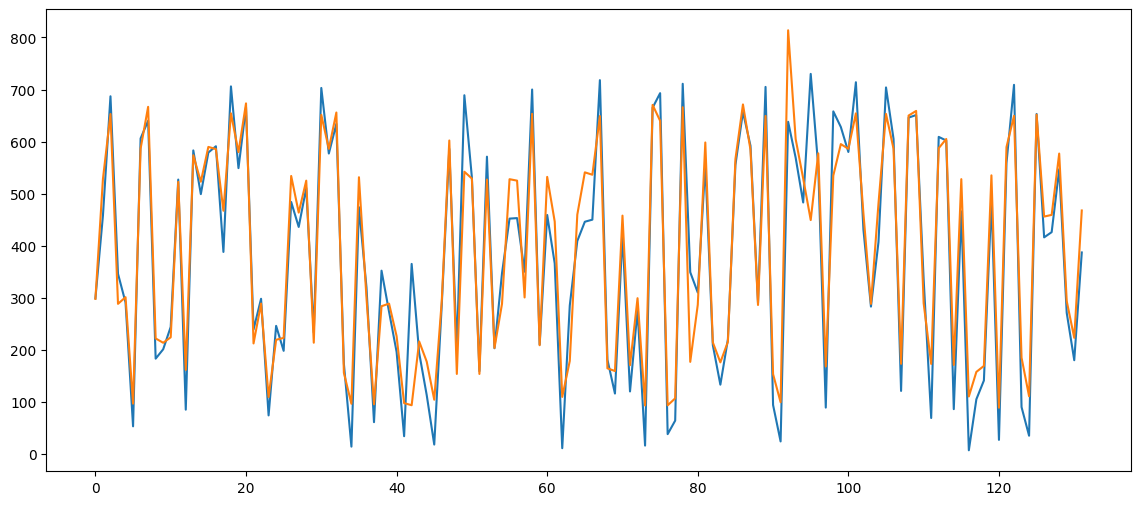

In [43]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(pred)

In [44]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", predicted_value - test_labels.iloc[0])

Predict label for following example:
cnt           3894.000000
season           4.000000
yr               0.000000
weathersit       2.000000
atemp            0.472846
Name: 0, dtype: float64

Predicted label:  [297.77663245]
Actual label: instant    299
Name: 0, dtype: int64
Deviation predicted from actual value:  instant   -1.223368
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(round(pred[:10] - test_labels.iloc[0:10])*100000, 2)

     instant
0  -100000.0
1  7000000.0
2 -3400000.0
3 -5800000.0
4  1000000.0
5  4400000.0
6 -2000000.0
7  2700000.0
8  3900000.0
9  1300000.0 2


In [46]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ", model.score(test_features, test_labels))

MAE: 47.080
R^2 value of the model:  0.9148596777100189


## 5. Exporting the preprocessed Train- and Testdata to CSV

In [47]:
train_df.to_csv('prerpocessed_traindata.csv', sep=',', encoding='utf-8', index=False)
test_df.to_csv('preprocessed_testdata.csv', sep=',', encoding='utf-8', index=False)

<div style="width:100%;height:30px;background-color:#E31134"></div>


## 6. Summary of Task 2

# 1. Baseline linear regression model

## 1.1 Minimal Preproccesing

Since the model will not work with missing values in the dataset, minimal preprocessing is requiered.

To address missing values in both the training and testing datasets, we use the `SimpleImputer` from scikit-learn. We replace all missing values with the most frequent values in each respective column. This imputation strategy is employed using the 'most_frequent' strategy, ensuring that the data remains complete for further analysis and modeling.



## 1.2 Splitting Data into Features and Labels

We split the training data into features and labels. The features, denoted as `train_features`, consist of the first 13 columns of the training dataset. The labels, represented by `train_labels`, correspond to the last column, capturing the target variable.

Similarly, we split the test data into features (`test_features`) and labels (`test_labels`) using the same logic, ensuring consistency between the training and testing datasets for subsequent modeling.




## 1.3. Linear Regression

For our initial model building, we employed linear regression, a supervised learning technique, to predict the bike rental count ('cnt') using labeled training data.

### Model Selection:
- We instantiated a linear regression model using the `linear_model.LinearRegression()` function.

### Training the Model:
- The model was trained on the training features (`train_features`) and labels (`train_labels`) using the `fit` method.

### Model Coefficients:
- The coefficients of the linear regression model, representing the weights assigned to each feature, are printed using `print(baseline_model.coef_)`. These coefficients provide insights into the contribution of each feature to the prediction of the target variable

This linear regression model serves as our baseline model, providing a starting point for evaluation and potential refinement in subsequent stages of model development.



### Model Prediction on Test Data

Using the trained linear regression model, we made predictions on the test examples to evaluate its performance on unseen data.

### Prediction Details:
- Predictions for bike rental counts ('cnt') in the test set were generated using the `predict` method on the trained linear regression model.
- The resulting predictions are stored in the `baseline_pred` array.

These predictions can be further evaluated and compared with the actual test labels to assess the model's accuracy and generalization capabilities.

### Model Prediction on Test Data

Using the trained linear regression model, we predicted bike rental counts ('cnt') for all examples in the test set.

### Prediction Results:
The predicted values for bike rental counts in the test set are stored in the `baseline_pred` array. These predictions will be utilized for evaluating the model's performance against the actual test labels.

This step allows us to assess the accuracy and effectiveness of the linear regression model on new, unseen data.


### Visualizing Model Output

We visualize the model output and compare it with the actual test labels. The `matplotlib.pyplot` library is employed to create a plot, where the blue line represents the actual test labels, and the orange line represents the predicted values (`baseline_pred`). This visualization aids in assessing the model's ability to capture the underlying patterns in the data.

#### What we can observe from the plot:

While the model generally exhibits a learning trend, it is apparent that the predictions are not as accurate as desired. There are instances of underestimation of bike rentals as low as -1252 but the prevalence of positive values suggests a general trend of overestimation, with values as high as 1663 above the test data. That suggest that there must be areas for improvement. Further exploration, feature engineering, or model tuning will be necessary to enhance accuracy and address these discrepancies.


## 1.4 Single Example Prediction and Evaluation

We demonstrate the model's ability to predict a single example from the test data. The features of the first test example are displayed, and the model's prediction is compared with the actual label. 

- Features of the example: `test_features.iloc[0,:]`
- Predicted label: `predicted_value`
- Actual label: `test_labels.iloc[0]`
- Deviation predicted from actual value: `predicted_value - test_labels.iloc[0]`

This analysis provides insight into the model's performance on individual instances, helping to understand its predictive accuracy.


- **Predicted Label:** [3406.9932736]
- **Actual Label:** 3894
- **Deviation from Actual Value:** -487.006726

The model predicted a bike rental count of approximately 3407 for a specific example, while the actual count was 3894. This suggests an underestimation by about 487. The model's accuracy and deviation from actual values indicate potential limitations and areas for improvement.

## Model Evaluation

We evaluate the performance of the model using two metrics:

### Mean Absolute Error (MAE) & Coefficient of Determination (R^2)

The Mean Absolute Error is a measure of the average absolute differences between the predicted and actual values. A lower MAE indicates better model performance.


mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

### Model Evaluation Results

After evaluating the model on the test data, we obtained the following metrics:

- **Mean Absolute Error (MAE):** 1054.862
  - The MAE represents the average absolute difference between the predicted and actual values. In this case, a lower MAE is desirable, and the obtained value provides insight into the average magnitude of prediction errors.

- **Coefficient of Determination (R^2):** 0.4002
  - The R^2 value measures the proportion of the variance in the bike rental counts that the model can explain. A higher R^2 value (closer to 1.0) indicates a better fit. In this instance, the obtained R^2 value of 0.4002 suggests that the model explains 40.02% of the variance in the test data.

These results offer an assessment of the model's performance, indicating areas for potential improvement or refinement.


## 2. Preprocessing

### 2.1 Training Data preprocessing

#### Handling Outliers in Humidity and Windspeed

To achieve better results with our model, we initiated preprocessing on our training data. Initially, we counted all values from the 'hum' feature that exceeded 100, addressing a total of 229 invalid values. Following that, we counted the negative values in the 'windspeed' feature, which amounted to 4.

- Humidity invalid values: 229
- Windspeed Outliers: 4

Additional to that, the 'hum' feature has 34 missing values, so that there are overall 263 invalid values out of a total of 600. We anticipate improvements in the model's performance, if we drop the feature alltogether. The 'windspeed' feature, with only 4 negative values, will be  handled by replacing the negative values with the median of windspeed.



#### Imputing Missing Values in 'season' Based on 'dteday'

To handle missing values in the 'season' feature of our training data, we implemented a imputation strategy using the 'dteday' (date) feature. For each missing value in 'season', we used the associated date information to estimate the season.

The imputation process is outlined as follows:
- If the date falls between December 21 and March 20, the season is assigned as 1 (Winter).
- If the date falls between March 21 and June 20, the season is assigned as 2 (Spring).
- If the date falls between June 21 and September 20, the season is assigned as 3 (Summer).
- If the date falls between September 21 and December 20, the season is assigned as 4 (Fall).



#### Imputing Missing Values in 'weekday' Based on 'dteday' - New Order

To address missing values in the 'weekday' feature of our training data, we basically used the same strategy as for the season. In this approach, we introduced a new order for the weekdays based on the provided date information.

The imputation process is as follows:
- We converted the 'dteday' column to a datetime format and extracted the day of the week using the `dayofweek` function.
- The resulting 'weekday' values now represent the order of weekdays (0 for Monday, 1 for Tuesday, and so on).

By deriving the 'weekday' values from the date, we effectively imputed missing values in a way that aligns with the chronological order of weekdays. 

These imputations ensures the completeness of the 'weekday' and 'season' features, contributing to a more comprehensive dataset for subsequent modeling.



### Power Transformation of 'windspeed'

Looking at histplots for all features the data for windspeed seems to be skewed ( leans toward the left side).


To improve the distribution of the 'windspeed' feature, a power transformation was applied using the PowerTransformer from scikit-learn. We will also do this later in the test data and get more into the detail of Power transformation. 








#### Handling Outliers in 'cnt'

From Task 1 we know that there are four outliers in our training data, in the label 'cnt'.
To address outliers in 'cnt' we identified and removed rows where the bike rental count exceeded 20,000. Outliers in the target variable disproportionately influences model training, and their removal helps prevent skewed predictions.

#### Outlier Removal Details:
- Rows with 'cnt' values greater than 20,000 were identified using boolean indexing.
- These outlier rows were subsequently dropped from the training dataset.

We double check our training data and generated a plot displaying the cnt label.
The results appear satisfactory, with cnt values ranging from approximately 0 to 8000.

### 2.2 Test Data Preprocesing

#### Addressing Outliers in 'hum' of the Test Data

Upon inspection, we is observed that there are, just like in the training data, instances of 'hum' values exceeding 100 in the test data.

The count of invalid values in the 'hum' feature with values greater than 100 in the test data is 45. 
We will handle these and the invalid values from the training data later via the feature selection.

#### Missing values in 'season'

Missing values in 'season' are handled the same way, we handled in our our training data using the imputation strategy using the 'dteday' (date) feature:

- If the date falls between December 21 and March 20, the season is assigned as 1 (Winter).
- If the date falls between March 21 and June 20, the season is assigned as 2 (Spring).
- and so on...

Looking at histplots for all features the data for windspeed seems to be skewed ( leans toward the left side).

### Power Transformation of 'windspeed' in the Test Data

To maintain consistency with the preprocessing applied to the training data, a power transformation was performed on the 'windspeed' feature of the test data. The PowerTransformer from scikit-learn was utilized for this transformation.

### Transformation Steps:
1. Power transformation was applied to the 'windspeed' values in the test data.
2. The transformed values were stored in a new column named 'windspeed ptransformed' in the `feature_test_df` DataFrame.

### Applying Transformation to Test Data:
To ensure consistency in the preprocessing pipeline, the transformed 'windspeed' values were then assigned back to the 'windspeed' column in the original test dataset (`test_df`).

#### Visualization:
A histogram of the transformed 'windspeed' values is generated and displayed for visual inspection. The transformation has achieved its intended purpose of making the distribution more even/symmetric.transformation has achieved its intended purpose of making the distribution more even or symmetric.


## 3. Feature Selection

In the feature selection process, we aim to identify and retain the most relevant features for modeling, optimizing the model's performance by reducing complexity and potential overfitting.

### Removing Unnecessary Features

To streamline and focus our dataset for modeling, the 'instant', 'dteday', and 'hum' features were identified as unnecessary and subsequently removed from both the training and test datasets.

### Removed Features:
1. 'instant': Represents the instant record number and is deemed unnecessary for modeling.
2. 'dteday': Denotes the date, and since relevant temporal information is captured by other features, it is excluded for simplicity.
3. 'hum': Humidity was previously identified as having invalid and missing values and may not contribute significantly to the model

### Dataset Simplification:
By eliminating these features, we aim to simplify the dataset, potentially improving model efficiency and interpretability while retaining the essential information needed for accurate predictions.


## Exploring Feature Correlations

To gain insights into the relationships between features in our dataset, we calculated the correlations among all features using the Pearson correlation coefficient again, like we did in Task 1.

### Correlation Analysis:
The correlation matrix, displays numerical values representing the strength and direction of linear relationships between pairs of features. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero suggest weak or no correlation as we know, based on the weak correlations we will further decide which features to include or drop.


To get better overview, we calculated the correlation coefficients. The resulting correlation values provide insights into how each feature correlates with the target variable 'cnt'.

These correlation coefficients help identify features that may have a stronger influence on predicting 'cnt', guiding us in the subsequent feature selection process.


## Selection of Features Based on Correlation with 'cnt'

In the feature selection process, we identified and extracted subsets of features from the preprocessed training data based on their correlation with the target variable 'cnt' (bike rental count).

### Selected Features:
1. **All Preprocessed Features:** `train_corr_high` includes all features after preprocessing.

2. **Nine Features with the Highest Correlation with 'cnt':** Subsetting the features to include the nine with the highest absolute correlation values.

3. **Four Features with the Highest Correlation with 'cnt':** Alternatively, a more focused subset includes only the four features with the highest absolute correlation values. This can be considered as a favorit feature set.

These subsets serve as candidates for subsequent model training, allowing us to assess the impact of feature selection on model performance and potentially enhance the interpretability of the model.


## 4. New Linear regression Model

### 4.1 Split

#### Feature and Label Selection

In this step, we refined the feature and label selection process based on the subsets of features identified earlier.

#### Selected Features and Labels:
#### Training Data:
- **Features (`train_features`):** Extracted features from the `train_corr_high` dataset, excluding the target variable ('cnt'). Subset includes the nine features with the highest correlation with 'cnt'.
- **Labels (`train_labels`):** Extracted the target variable 'cnt' from the `train_corr_high` dataset.

#### Test Data:
- **Features (`test_features`):** Extracted specific features from the test dataset, including 'atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed', 'mnth', 'holiday', and 'weekday'.
- **Labels (`test_labels`):** Extracted the target variable 'cnt' from the test dataset.

These refined feature and label sets will be used to train and evaluate the linear regression model, providing a focused exploration of feature subsets and their impact on predictive performance.



### 4.2. Linear Regression

#### Model Building with Linear Regression (Refined Features)

Just like with our baseline model building process, we employed linear regression, but this time utilizing labeled training data with the refined feature and label subsets.

#### Model Selection:
- We instantiated a new linear regression model using the `linear_model.LinearRegression()` function.

#### Training the Model:
- The model was trained on the refined training features (`train_features`) and labels (`train_labels`) using the `fit` method.


### Model Prediction on Test Data (Refined Features)

Using the refined linear regression model, we made predictions on the test examples to evaluate its performance on unseen data.

### Prediction Results:
The predicted values for bike rental counts ('cnt') in the test set are stored in the `pred` array. These predictions are derived from the refined set of features and will be used for evaluating and visualization by creating a plot, just like we did with the baseline model.




## 4.3 Evaluation

### Visualization of Model Predictions

To visually assess the performance of the refined linear regression model, we plotted the actual test labels against the predicted values.

#### Visualization Details:
- A line plot was created using Matplotlib to display the actual test labels (`test_labels`) and the corresponding predicted values (`pred`).
- The x-axis represents the data points, and the y-axis represents the bike rental counts ('cnt').

This visualization aids in understanding how well the model predictions align with the actual values, providing insights into the model's accuracy and its ability to capture the underlying patterns in the test data.

## Prediction Deviation for the First 10 Examples

To further analyze the model's performance on the first 10 examples in the test set, the deviation between the predicted and actual bike rental counts ('cnt') was calculated and rounded for readability.

We evaluate the performance of the model using two metrics again:

## Mean Absolute Error (MAE) & Coefficient of Determination (R^2) of Model A, B & C

### Model A

- **Mean Absolute Error (MAE):** 930.547

- **Coefficient of Determination (R^2):** 0.3664375340807854


### Model B

- **Mean Absolute Error (MAE):** 1056.867

- **Coefficient of Determination (R^2):** 0.3249772646425966


### Model C

- **Mean Absolute Error (MAE):** 912.402

- **Coefficient of Determination (R^2):** 0.3808507284807302


### Furhter Models

| Iteration | Selected Features             | Performance (R²) | Decision          |
|------------|-------------------------------|------------------|-------------------|
| 1          | season                        | 0.114            | -                 |
| 2          | season, yr                    | 0.298            | keep yr           |
| 3          | season, yr, mnth              | 0.298            | not keep mnth     |
| 4          | season, yr, holiday           | 0.298            | not keep holiday  |
| 5          | season, yr, weekday           | 0.289            | not keep weekday  |
| 6          | season, yr, workingday        | 0.296            | not keep workingday|
| 7          | season, yr, weathersit        | 0.332            | keep weathersit   |
| 8          | season, yr, weathersit, temp  | 0.379            | keep temp         |


Using the Forward Selection, at Instance 8 we could reach no better Performance value. 

### Model D

- **Coefficient of Determination (R^2):** 0.379

